## Netflix Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [7]:
df = df.dropna(subset=['type', 'title', 'director', 'cast', 'date_added' , 'release_year','rating', 'duration', 'listed_in','description'])


## Movies  VS  tv shows

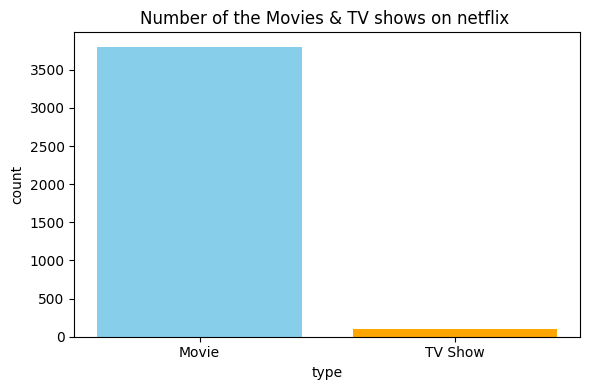

In [8]:
type_counts = df['type']. value_counts()
plt.figure(figsize=(6,4))

plt.bar(type_counts.index , type_counts.values , color =['skyblue' , 'orange'])
plt.title('Number of the Movies & TV shows on netflix ')
plt.xlabel('type')
plt.ylabel('count')

plt.tight_layout()

plt.savefig('movies_vs_tvshows.png')
plt.show()


## content ratings

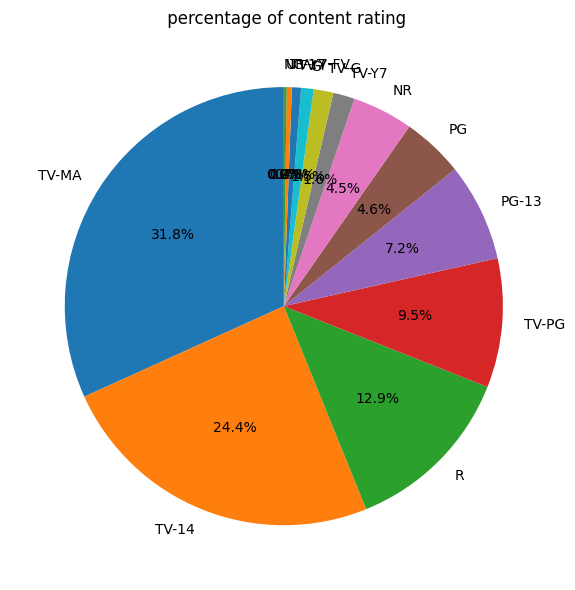

In [9]:
rating_counts = df['rating'] .value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index ,  autopct='%1.1f%%', startangle=90 )
plt.title(' percentage of content rating')

plt.tight_layout()

plt.savefig('content_rating_piechart.png')
plt.show()



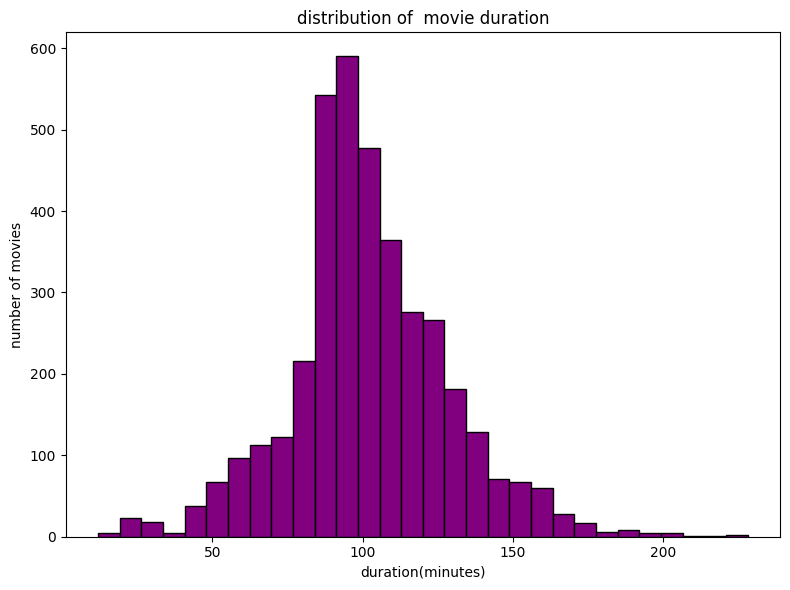

In [10]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movies_df['duration'], bins = 30 , color='purple', edgecolor = 'black') 

plt.title('distribution of  movie duration')
plt.xlabel('duration(minutes)')
plt.ylabel('number of movies')

plt.tight_layout()

plt.savefig('movies_duration_histogram.png')
plt.show()




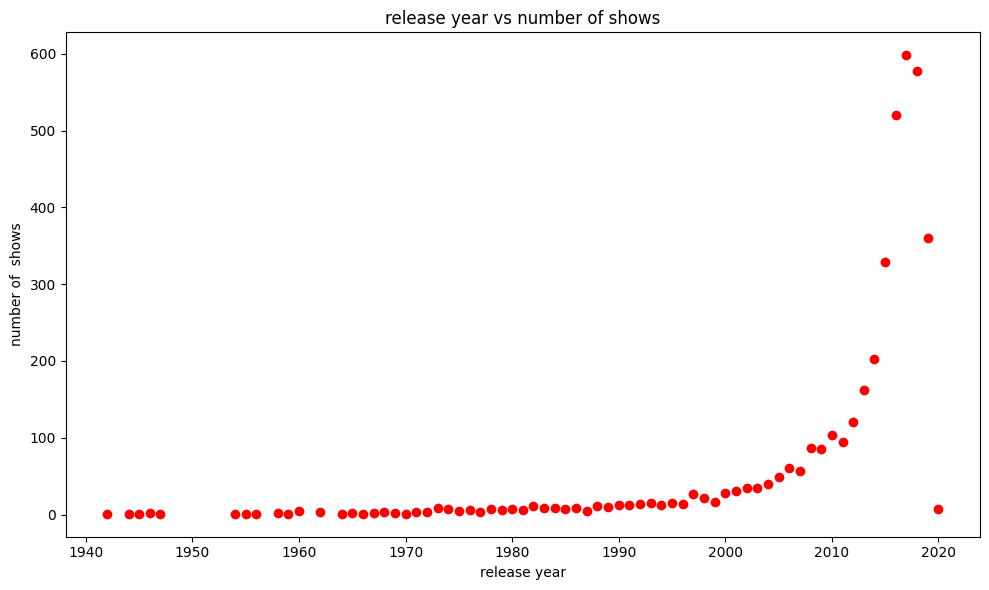

In [22]:
release_counts = df['release_year']. value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index , release_counts.values, color = 'red')

plt.title('release year vs number of shows')
plt.xlabel('release year')
plt.ylabel('number of  shows')

plt.tight_layout()

plt.savefig('release_year_scatter.png')
plt.show()

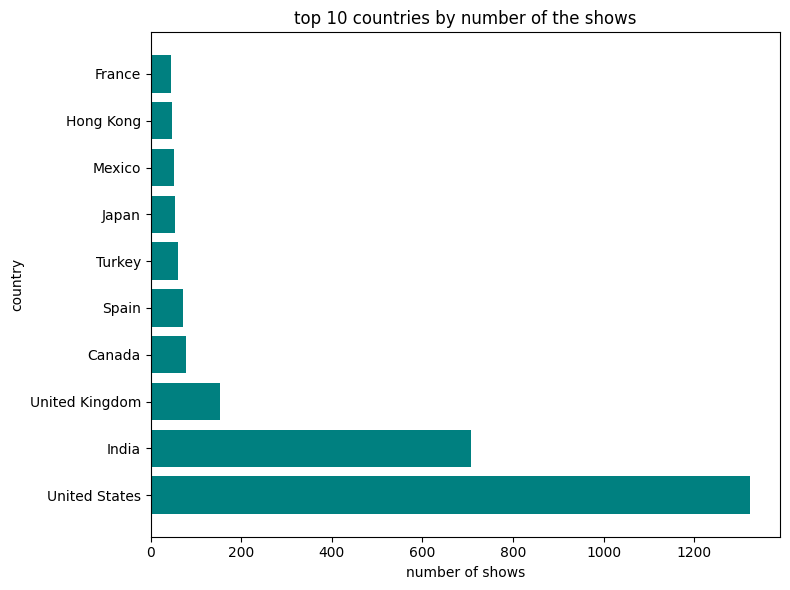

In [11]:
import matplotlib.pyplot as plt

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index , country_counts.values , color = 'teal')

plt.title('top 10 countries by number of the shows')
plt.xlabel('number of shows')
plt.ylabel('country')

plt.tight_layout()

plt.savefig('top_10_countries.png')
plt.show()

In [13]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


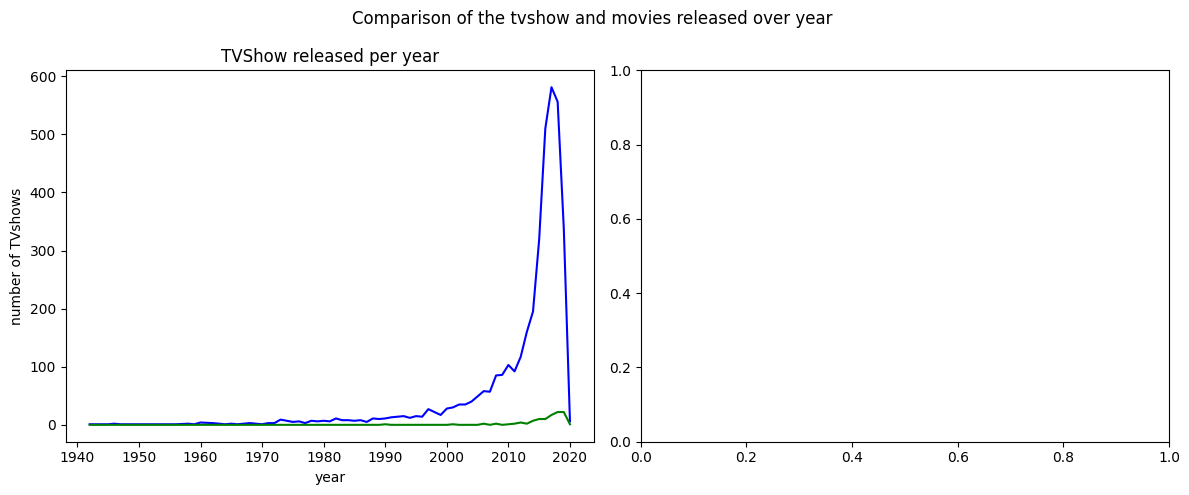

In [21]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

# first subplot of the movies 
ax[0].plot(content_by_year.index, content_by_year['Movie'] , color ='blue')
ax[0].set_title('movies released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

# secound subplot is TV_show
ax[0].plot(content_by_year.index, content_by_year['TV Show'] , color ='green')
ax[0].set_title('TVShow released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of TVshows')

fig.suptitle('Comparison of the tvshow and movies released over year ')
plt.tight_layout()
plt.savefig('movies_tvshow_comaparision.png')
plt.show()